# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [9]:
df.drop(columns=['TV','radio','newspaper'], inplace=True)

In [10]:
df.head()

,sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0


In [11]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14.022500,200.860500
std,5.217457,92.985181
min,1.600000,11.700000
25%,10.375000,123.550000
50%,12.900000,207.350000
75%,17.400000,281.125000
max,27.000000,433.600000


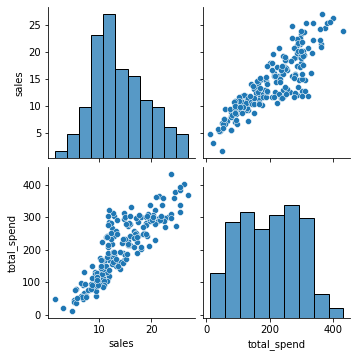

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [62]:
X = df.drop(columns='sales')
Y = df['sales']
#X = df.iloc[:,1]
#Y = df.iloc[:,0]

# X = df.iloc[:,1]
# Y = df.iloc[:,-2]

In [63]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [67]:
Y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
print('Model Intercept : ', model.intercept_)
print('Model Coefficient : ', model.coef_)

Model Intercept :  4.199106500868718
Model Coefficient :  [0.04895385]


In [69]:
model.predict([[200]])

array([13.98987609])

In [66]:
model.predict(X_test.iloc[1].values.reshape(1,1))

array([18.68944549])

In [21]:
spend= 200
predicted_sale = 4.199 +0.0489*spend
predicted_sale

13.979

In [22]:
X_new = pd.DataFrame({'total_spend':[200]})
X_new

,total_spend
0,200


In [23]:
model.predict(X_new)

array([13.98987609])

## Prediction

In [24]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

In [25]:
train_prediction

array([18.94890089, 15.35568845, 12.46741142, 10.30854673, 19.04680858,
        7.02374353, 20.01609477,  6.85240506, 11.46875292,  7.81679586,
        9.76026363,  8.57558051, 15.56129461, 16.39351003, 16.03614694,
       15.99208847, 13.2457776 , 15.48296845, 17.73484546, 19.02722705,
       10.68059597, 12.18837449, 10.82256213, 15.85012231,  8.71754667,
       17.77400854, 12.56042373, 19.6538363 ,  8.42871896, 21.75885176,
        8.05177433, 19.11534397, 25.42549497, 18.19501163, 16.0802054 ,
       13.56397761, 13.24088222,  9.7700544 , 17.89149777, 14.68991612,
       16.43756849, 10.49946673, 18.47404856, 11.60092831, 18.28802394,
       11.53728831,  8.90357129, 18.00898701, 13.67167608, 16.73618696,
        7.97344818, 20.70144865, 23.37922413, 16.37392849, 17.33831929,
       12.52615604, 14.12694687,  8.80566359, 14.36682072, 18.82651627,
       16.75087312,  6.11320196,  5.24671885, 13.39753453, 18.19501163,
       17.48518084, 19.13492551, 20.67207634, 17.94534701, 18.77

## Ploting the Least Square Line

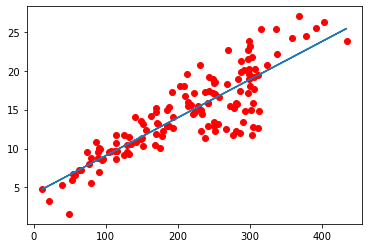

In [70]:
plt.scatter(X_train,Y_train,color='red')
train_prediction = model.predict(X_train)
plt.plot(X_train,train_prediction)
plt.show()

## Evalution Matrics

In [27]:
train_residual = Y_train - train_prediction
test_residual = Y_test - test_prediction

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
MAE = mean_absolute_error(Y_test, test_prediction)
MAE

1.9143627368130551

In [30]:
MSE = mean_squared_error(Y_test, test_prediction)
MSE

6.41586631254322

In [31]:
RMSE = np.sqrt(MSE)
RMSE

2.5329560423629975

In [32]:
model.score(X_train, Y_train)    #### Train R Square

0.7404192834391546

In [33]:
model.score(X_test, Y_test)     #### Train R Square

0.7650262463310722

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(Y_test, test_prediction)

0.7650262463310722

In [36]:
r2_score(Y_train, train_prediction)

0.7404192834391546

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5)
scores

array([0.74964192, 0.79455226, 0.76417134, 0.74872042, 0.65980565])

In [38]:
abs(scores.mean())     #### No overfitting & No underfitting

0.743378317855542

## Diagnosis Test

## 1 - Linearity

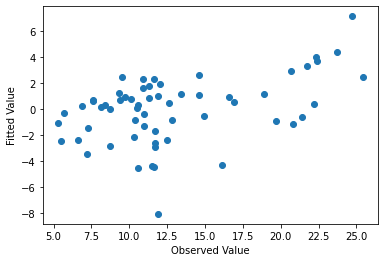

In [39]:
plt.scatter(Y_test, test_residual)
plt.xlabel('Observed Value')
plt.ylabel('Fitted Value')
plt.show()

## 2 - Normality

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


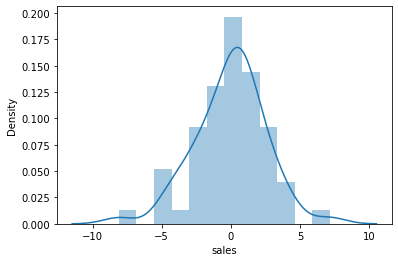

In [40]:
sns.distplot(test_residual,kde=True)
plt.show()

## 3 - Homoscadesicity

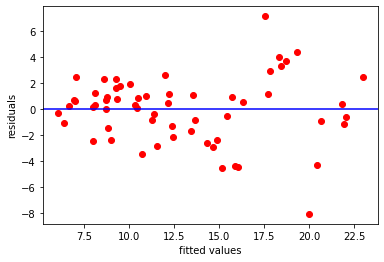

In [41]:
plt.scatter(test_prediction,test_residual, c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [42]:
import statsmodels.formula.api as smf
m = smf.ols('Y~X', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           5.06e-62
Time:                        19:36:18   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.000       3.378       5.108
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Retaining Model on Full Data

In [43]:
final_model = LinearRegression()
final_model.fit(X,Y)
final_model.coef_

array([0.04868788])

In [44]:
final_model.predict([[200]])

array([13.98060408])

## Deployment

In [45]:
from joblib import dump

In [46]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

## Load Model

In [47]:
from joblib import load

In [48]:
loaded_model = load('sales_model.joblib')

In [49]:
loaded_model.intercept_

4.243028216036329

In [50]:
loaded_model.coef_

array([0.04868788])

In [51]:
loaded_model.predict([[200]])

array([13.98060408])

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

In [54]:
X_poly

array([[3.3710000e+02, 1.1363641e+05],
       [1.2890000e+02, 1.6615210e+04],
       [1.3240000e+02, 1.7529760e+04],
       [2.5130000e+02, 6.3151690e+04],
       [2.5000000e+02, 6.2500000e+04],
       [1.3260000e+02, 1.7582760e+04],
       [1.1380000e+02, 1.2950440e+04],
       [1.5140000e+02, 2.2921960e+04],
       [1.1700000e+01, 1.3689000e+02],
       [2.2360000e+02, 4.9996960e+04],
       [9.6100000e+01, 9.2352100e+03],
       [2.4270000e+02, 5.8903290e+04],
       [1.2480000e+02, 1.5575040e+04],
       [1.1230000e+02, 1.2611290e+04],
       [2.8300000e+02, 8.0089000e+04],
       [2.9600000e+02, 8.7616000e+04],
       [2.1840000e+02, 4.7698560e+04],
       [3.7680000e+02, 1.4197824e+05],
       [1.0800000e+02, 1.1664000e+04],
       [1.9030000e+02, 3.6214090e+04],
       [2.9950000e+02, 8.9700250e+04],
       [2.6600000e+02, 7.0756000e+04],
       [7.8700000e+01, 6.1936900e+03],
       [2.7140000e+02, 7.3657960e+04],
       [9.3200000e+01, 8.6862400e+03],
       [2.8590000e+02, 8.

In [55]:
x= 6*np.random.rand(200,1)-3
y=0.8*x**2 + 0.9*x + 2 + np.random.rand(200,1)

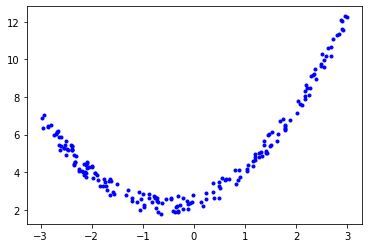

In [56]:
plt.plot(x,y,'b.')

In [57]:
x

array([[ 1.40529802],
       [ 0.37854465],
       [ 0.49149496],
       [-2.15357823],
       [-1.89358903],
       [ 1.62756372],
       [ 2.79360425],
       [-1.93829836],
       [-0.87942077],
       [-1.51017222],
       [-1.83717932],
       [ 2.47964882],
       [-1.97507254],
       [-0.71765312],
       [-0.7609941 ],
       [-2.54019415],
       [-2.67431722],
       [-2.41321468],
       [-2.39264553],
       [-2.0828311 ],
       [-2.52002981],
       [ 1.77563822],
       [-1.1117983 ],
       [ 2.67965748],
       [-0.753059  ],
       [-1.55419168],
       [ 2.24556991],
       [ 1.33872983],
       [-0.13644028],
       [ 0.8878927 ],
       [ 1.79013459],
       [-1.8699516 ],
       [ 1.36441107],
       [-1.77510703],
       [-1.20952901],
       [-1.21872047],
       [ 2.12041475],
       [ 1.47003405],
       [ 2.28678658],
       [-1.98958822],
       [-1.73587432],
       [ 1.03551635],
       [-2.10508558],
       [ 2.06870188],
       [-2.10198798],
       [-2

In [58]:
y

array([[ 5.12004982],
       [ 3.44255031],
       [ 3.25827303],
       [ 3.84137328],
       [ 3.85996814],
       [ 5.64896944],
       [11.2914974 ],
       [ 3.9424452 ],
       [ 2.6390737 ],
       [ 3.38364641],
       [ 3.2624804 ],
       [ 9.73932274],
       [ 3.6764962 ],
       [ 2.6494537 ],
       [ 2.65718474],
       [ 5.28796715],
       [ 6.13393333],
       [ 5.43611911],
       [ 5.15796978],
       [ 4.20938347],
       [ 5.47306153],
       [ 6.25333987],
       [ 2.41199444],
       [10.65264599],
       [ 2.65092749],
       [ 2.83624142],
       [ 8.08378658],
       [ 4.88250855],
       [ 2.46432407],
       [ 4.13874352],
       [ 6.37838517],
       [ 3.56219913],
       [ 5.4665784 ],
       [ 3.28286523],
       [ 2.63463389],
       [ 2.4850743 ],
       [ 7.57307559],
       [ 6.04269802],
       [ 9.14526655],
       [ 4.32766551],
       [ 3.48600172],
       [ 4.07222481],
       [ 4.38943865],
       [ 7.64090346],
       [ 3.95330341],
       [ 5